In [ ]:
#nếu muốn convert ra file model thì chạy dòng này trước
!pip install skl2onnx

# EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         

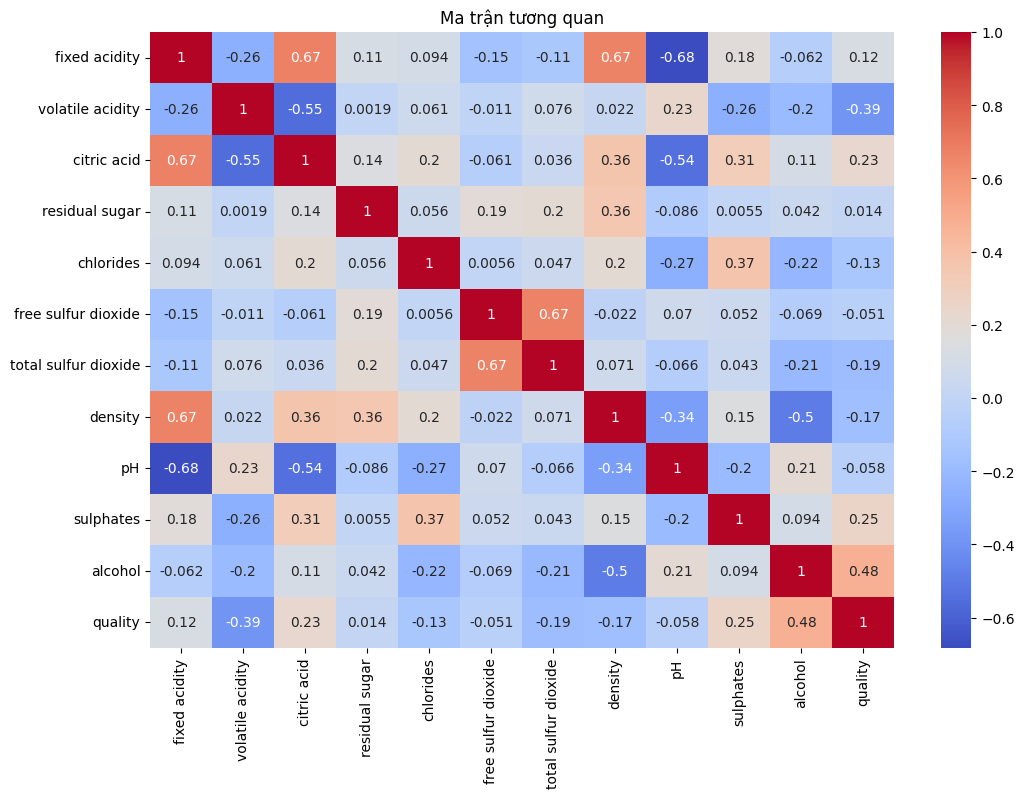

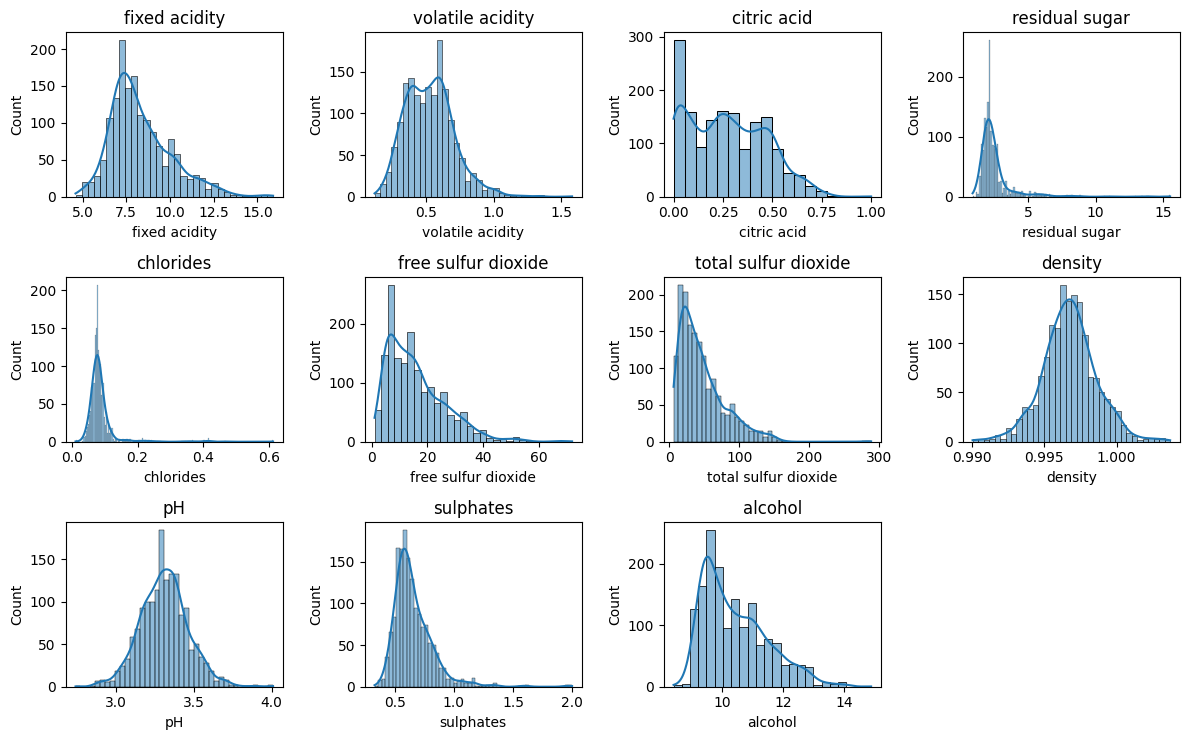

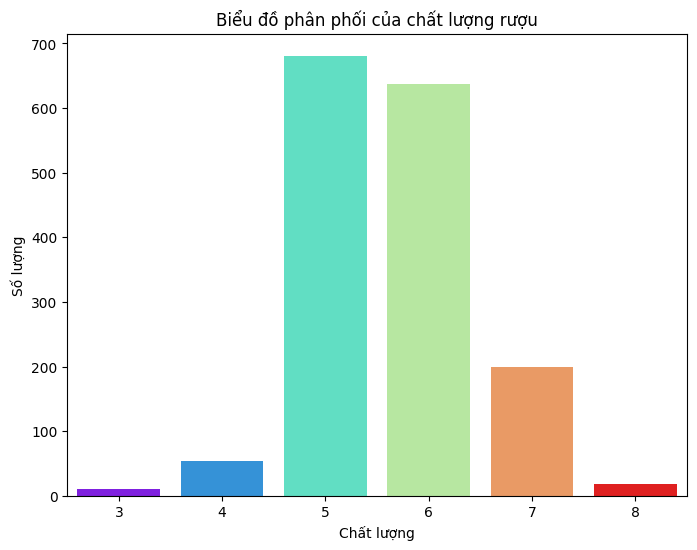

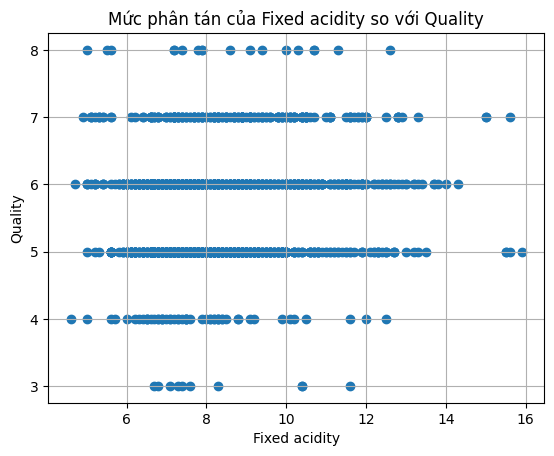

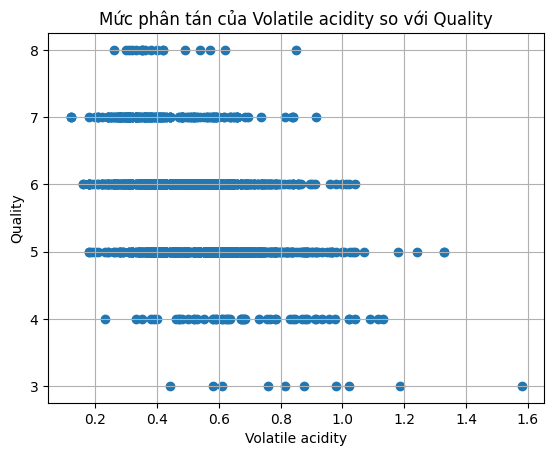

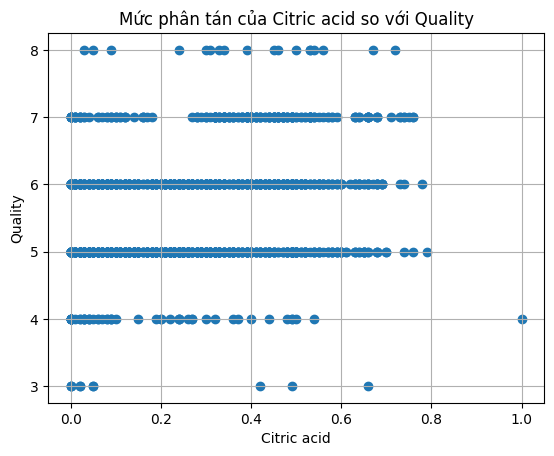

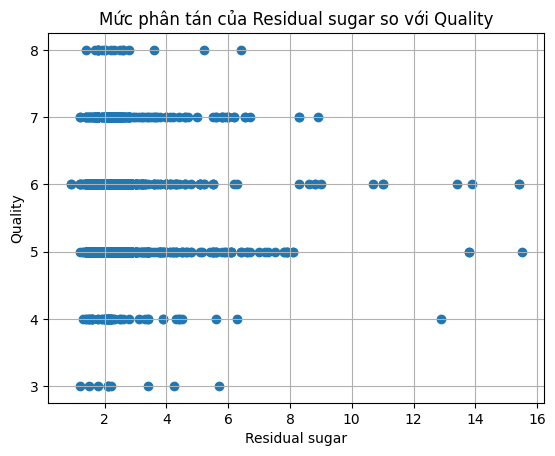

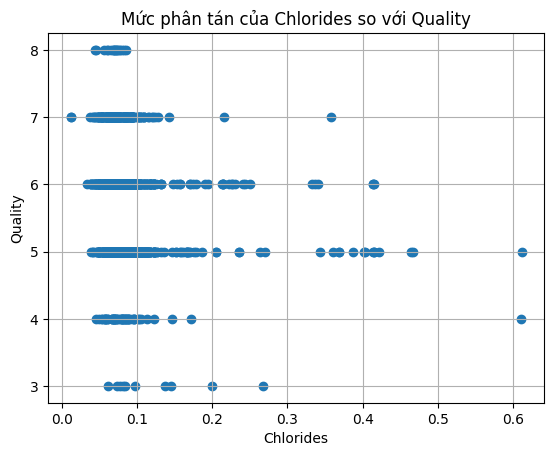

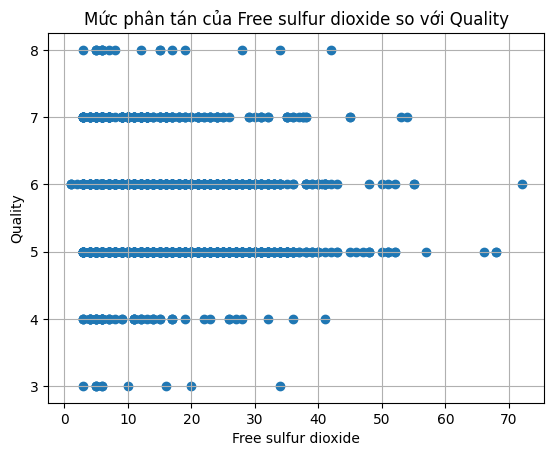

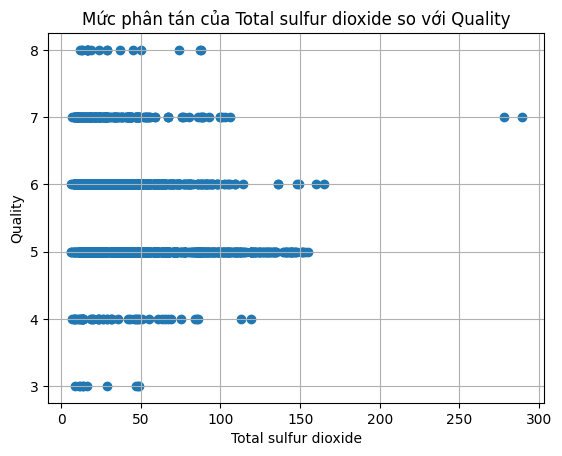

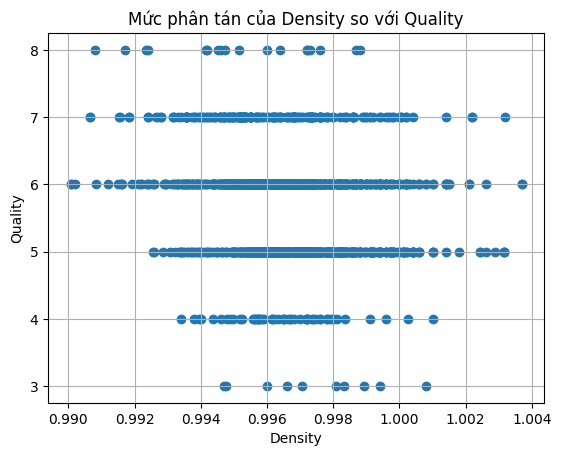

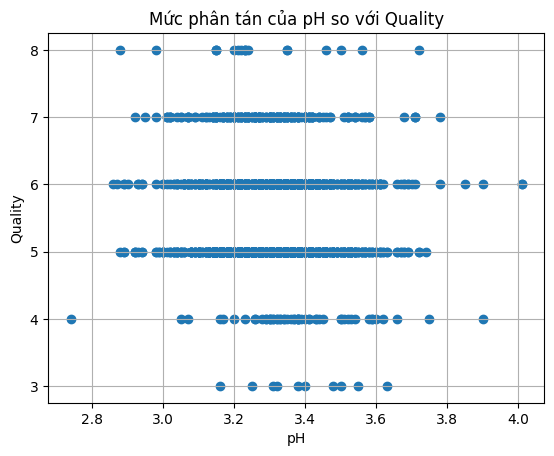

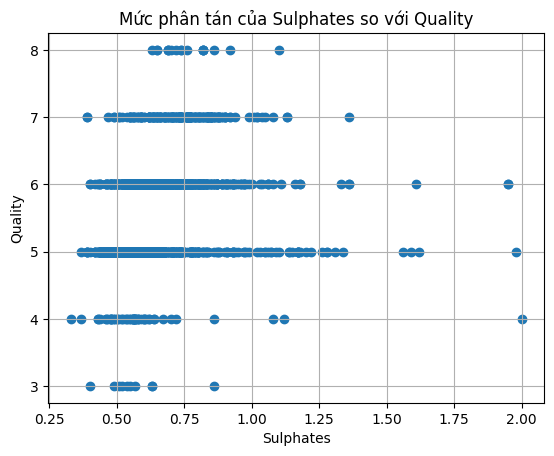

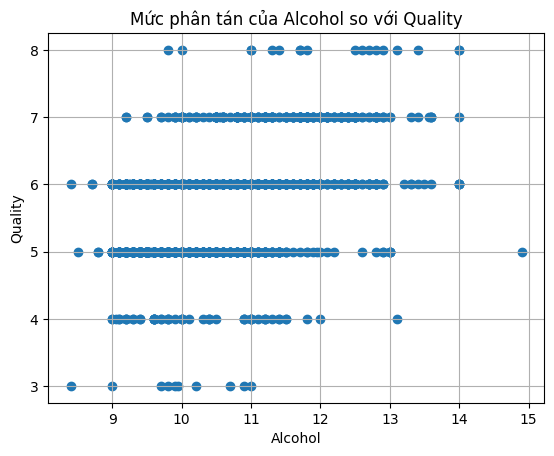

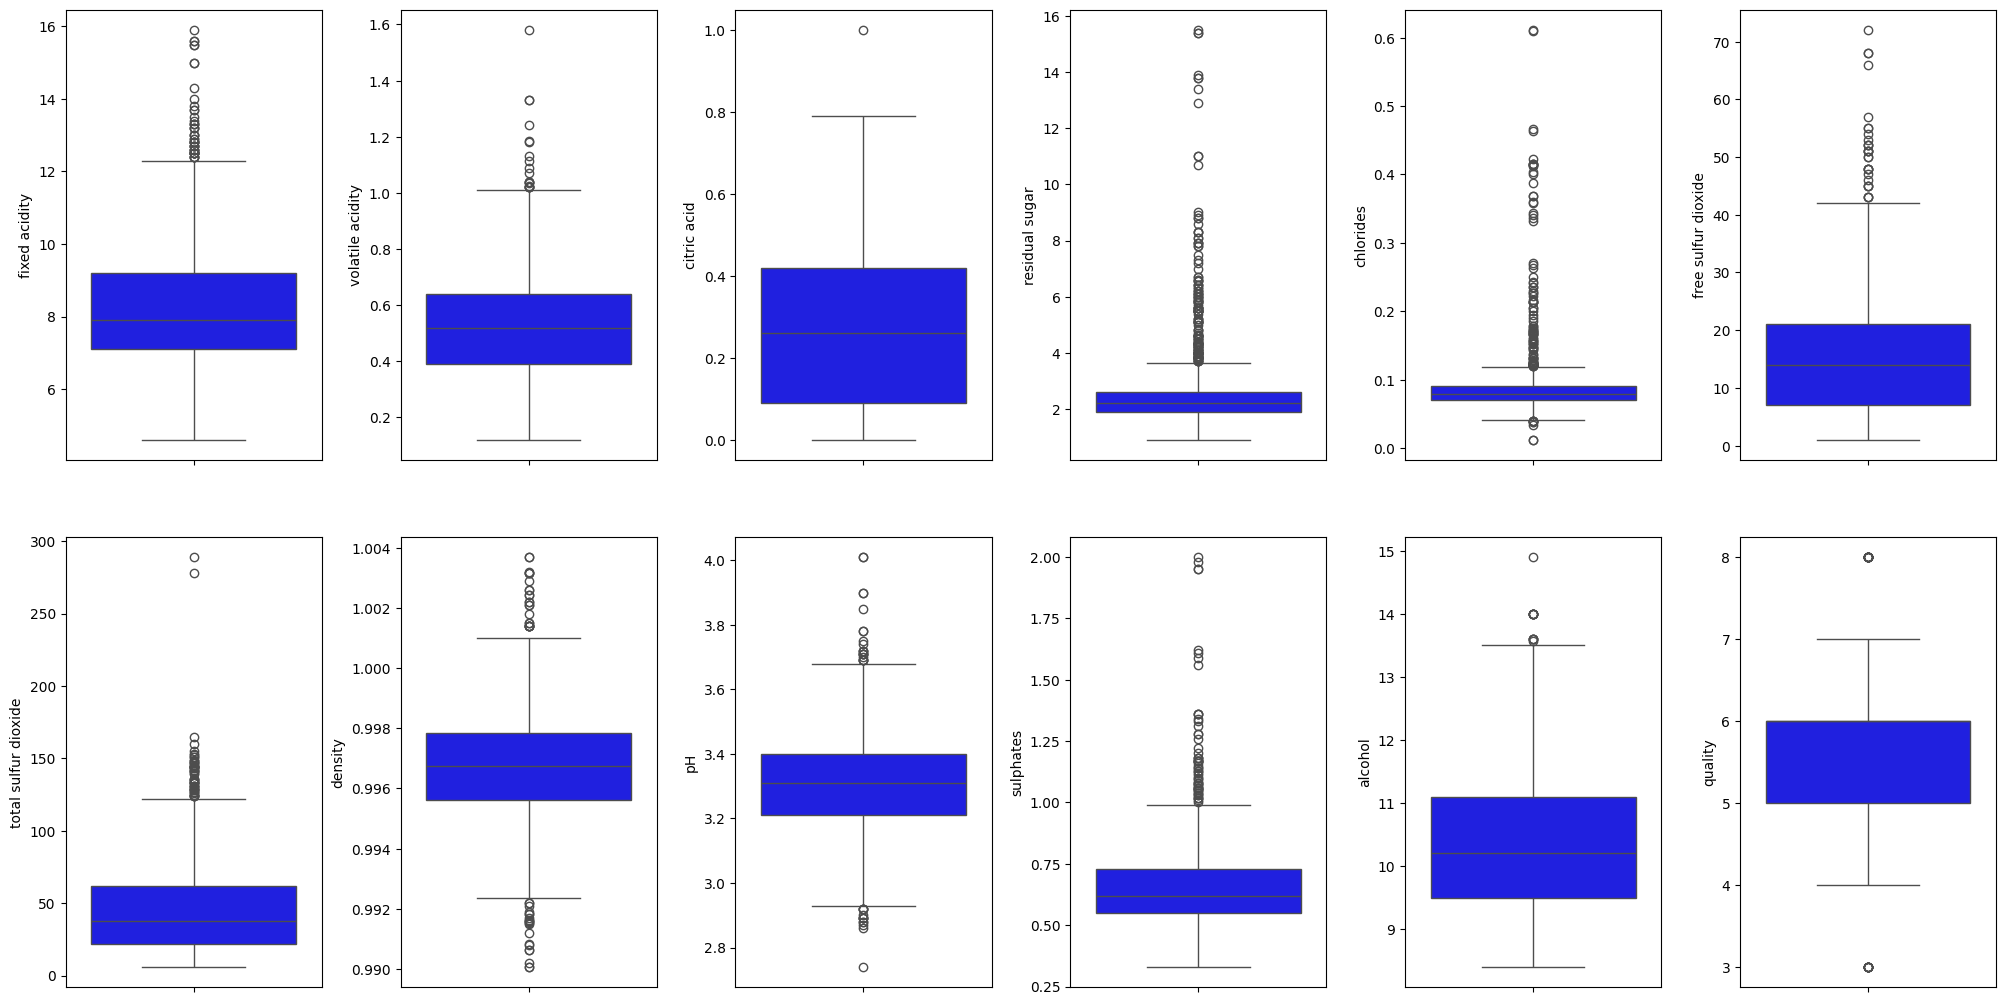

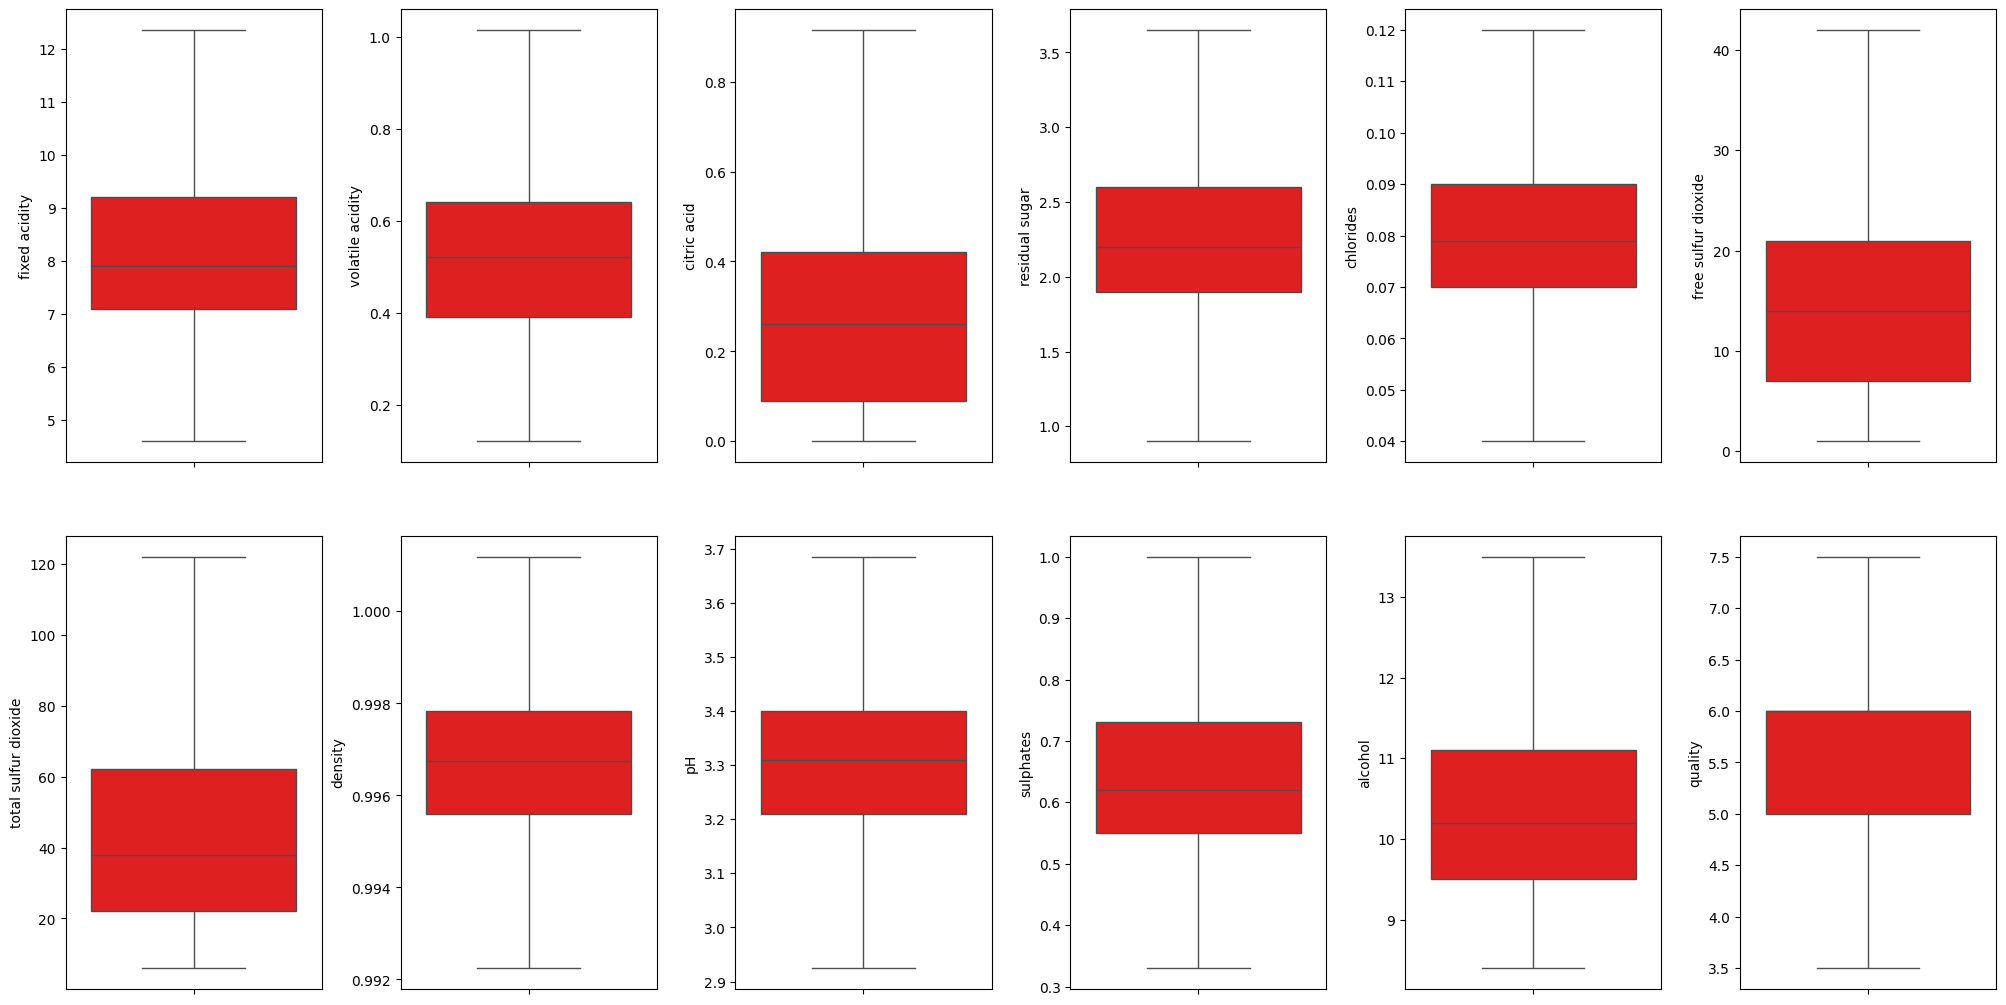

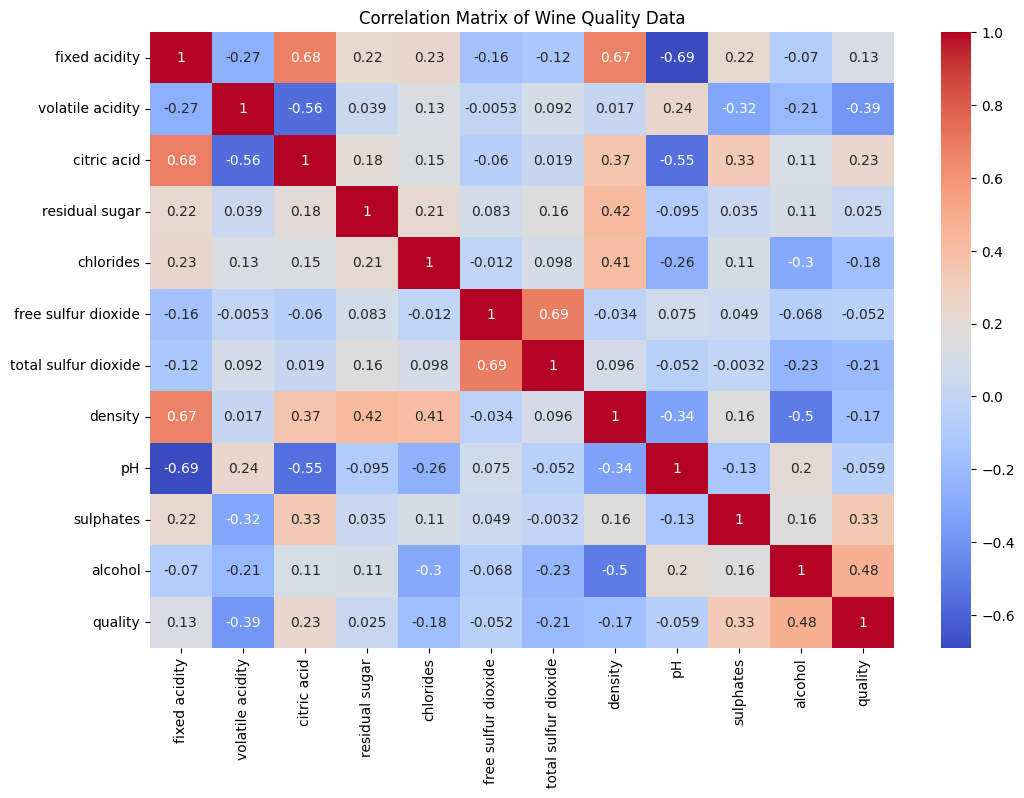

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings



# Suppress warning
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Load the dataset
file_path = 'winequality-red.csv'
wine_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print(wine_data.info())
print(wine_data.head())

# Summary statistics
summary = wine_data.describe()
print(summary)

# Check for missing values
missing_values = wine_data.isnull().sum()
print(missing_values)

# Correlation matrix
correlation_matrix = wine_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

# Lấy danh sách các cột phù hợp để vẽ biểu đồ
columns_to_plot = [col for col in wine_data.columns if col != "quality"]

# Tính toán số lượng hàng và cột trong subplot
num_columns = len(columns_to_plot)
num_rows = (num_columns - 1) // 4 + 1

# Vẽ biểu đồ phân phối dạng đường cho từng cột phù hợp
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 2.5))
fig.subplots_adjust(hspace=0.5)

# Lặp qua từng cột và vẽ biểu đồ phân phối dạng đường
for i, column in enumerate(columns_to_plot):
    ax = axs[i // 4, i % 4]
    sns.histplot(data=wine_data, x=column, kde=True, ax=ax)
    ax.set_title(column)

# Ẩn các subplot trống
if num_columns < num_rows * 4:
    for j in range(num_columns, num_rows * 4):
        fig.delaxes(axs[j // 4, j % 4])

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Distribution of target variable (quality)
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=wine_data, palette='rainbow', hue='quality', legend=False)
plt.title('Biểu đồ phân phối của chất lượng rượu')
plt.xlabel('Chất lượng')
plt.ylabel('Số lượng')
plt.show()

# Scatter plot of fixed acidity against its quality
plt.scatter(wine_data['fixed acidity'],wine_data['quality'])
plt.xlabel('Fixed acidity')
plt.ylabel('Quality')
plt.title('Mức phân tán của Fixed acidity so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of volatile acidity against its quality
plt.scatter(wine_data['volatile acidity'],wine_data['quality'])
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.title('Mức phân tán của Volatile acidity so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of citric acid against its quality
plt.scatter(wine_data['citric acid'],wine_data['quality'])
plt.xlabel('Citric acid')
plt.ylabel('Quality')
plt.title('Mức phân tán của Citric acid so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of residual sugar against its quality
plt.scatter(wine_data['residual sugar'],wine_data['quality'])
plt.xlabel('Residual sugar')
plt.ylabel('Quality')
plt.title('Mức phân tán của Residual sugar so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of chlorides against its quality
plt.scatter(wine_data['chlorides'],wine_data['quality'])
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.title('Mức phân tán của Chlorides so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of free sulfur dioxide against its quality
plt.scatter(wine_data['free sulfur dioxide'],wine_data['quality'])
plt.xlabel('Free sulfur dioxide')
plt.ylabel('Quality')
plt.title('Mức phân tán của Free sulfur dioxide so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of total sulfur dioxide against its quality
plt.scatter(wine_data['total sulfur dioxide'],wine_data['quality'])
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Quality')
plt.title('Mức phân tán của Total sulfur dioxide so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of density against its quality
plt.scatter(wine_data['density'],wine_data['quality'])
plt.xlabel('Density')
plt.ylabel('Quality')
plt.title('Mức phân tán của Density so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of pH against its quality
plt.scatter(wine_data['pH'],wine_data['quality'])
plt.xlabel('pH')
plt.ylabel('Quality')
plt.title('Mức phân tán của pH so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of sulphates against its quality
plt.scatter(wine_data['sulphates'],wine_data['quality'])
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.title('Mức phân tán của Sulphates so với Quality')
plt.grid(True)
plt.show()

# Scatter plot of alcohol against its quality
plt.scatter(wine_data['alcohol'],wine_data['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Mức phân tán của Alcohol so với Quality')
plt.grid(True)
plt.show()



# Check outlier lần thứ nhất
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_data.items():
    sns.boxplot(y=col, data=wine_data, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


# Xử lý outliers bằng phương pháp quartile
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:
                    df[col][i] = upper_bound[col]


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(wine_data)

# Check lại outlier
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Ma trận tương quan
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Wine Quality Data')
plt.show()


## CUSTOM STACKING MODEL

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

# Custom StackingRegression
class CustomStackingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, base_models, final_model):
        self.base_models = base_models
        self.final_model = final_model

    def fit(self, X, y):
        self.base_models_predictions_ = []

        for model in self.base_models:
            model.fit(X, y)
            predictions = model.predict(X)
            self.base_models_predictions_.append(predictions)

        X_stacked = np.column_stack(self.base_models_predictions_)
        self.final_model.fit(X_stacked, y)

    def predict(self, X):
        base_models_predictions = []

        for model in self.base_models:
            predictions = model.predict(X)
            base_models_predictions.append(predictions)

        X_stacked = np.column_stack(base_models_predictions)
        return self.final_model.predict(X_stacked)

# Chia train test và phần học máy

In [ ]:
#from stacking_regressor import CustomStackingRegressor

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Initialize models
dt_model = DecisionTreeRegressor(max_depth=5)
gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5)
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15)

# Train models
dt_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Predictions
dt_pred = dt_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Evaluation
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, r2, mae

dt_metrics = evaluate_model(y_test, dt_pred)
gb_metrics = evaluate_model(y_test, gb_pred)
rf_metrics = evaluate_model(y_test, rf_pred)

print("Decision Tree Regression Metrics (MSE, R2, MAE):", dt_metrics)
print("Gradient Boosting Metrics (MSE, R2, MAE):", gb_metrics)
print("Random Forest Metrics (MSE, R2, MAE):", rf_metrics)

# Base models
estimators = [
    ('dt', dt_model),
    ('gb', gb_model),
    ('rf', rf_model)
]



# Final model
final_model = LinearRegression()

# Stacking model
# stacking_model = StackingRegressor(estimators=estimators, final_estimator=final_model)

# # Stacking model
stacking_model = CustomStackingRegressor(base_models=[model for _, model in estimators], final_model=final_model)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Predictions
stacking_pred = stacking_model.predict(X_test_scaled)

# Evaluation
stacking_metrics = evaluate_model(y_test, stacking_pred)



print("Stacking Regressor Metrics (MSE, R2, MAE):", stacking_metrics)


(1279, 11) (320, 11) (1279,) (320,)
Decision Tree Regression Metrics (MSE, R2, MAE): (0.43181434532266205, 0.29624247646797597, 0.4990908525542851)
Gradient Boosting Metrics (MSE, R2, MAE): (0.309546751194789, 0.4955103798706626, 0.41866228609827427)
Random Forest Metrics (MSE, R2, MAE): (0.28214770538600836, 0.5401644883651818, 0.41394418663367566)
Stacking Regressor Metrics (MSE, R2, MAE): (0.30087939867461205, 0.5096361601075858, 0.40874052335215855)


# Mô hình học sâu

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Deep Learning Model
# Initialize the neural network model
dl_model = Sequential()
dl_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(1, activation='linear'))

# Compile the model
dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = dl_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32)

# Predictions
dl_pred = dl_model.predict(X_test_scaled)

# Convert predictions to 1D array
#dl_pred = dl_pred.flatten()

# Evaluation
dl_metrics = evaluate_model(y_test, dl_pred)
print("Deep Learning Metrics (MSE, R2, MAE):", dl_metrics)

Epoch 1/100
40/40 [==============================] - 2s 19ms/step - loss: 17.7043 - mae: 4.0157 - val_loss: 6.4651 - val_mae: 2.2618
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 3.4215 - mae: 1.5165 - val_loss: 2.6000 - val_mae: 1.2967
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 2.1016 - mae: 1.1569 - val_loss: 1.8948 - val_mae: 1.1192
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 1.7138 - mae: 1.0488 - val_loss: 1.6112 - val_mae: 1.0304
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4982 - mae: 0.9722 - val_loss: 1.4461 - val_mae: 0.9783
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 1.3544 - mae: 0.9229 - val_loss: 1.3243 - val_mae: 0.9367
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 1.2394 - mae: 0.8825 - val_loss: 1.2230 - val_mae: 0.8990
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1320 -

In [ ]:
# Tạo dữ liệu mới
custom_data_new = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.7],
    'citric acid': [0.0],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})

# Tiền xử lý dữ liệu mới (nếu cần)
custom_data_new_scaled = scaler.transform(custom_data_new)  # Tiêu chuẩn hóa dữ liệu mới

# Dự đoán chất lượng rượu sử dụng mô hình Linear Regression
dt_custom_pred_new = dt_model.predict(custom_data_new_scaled)
print("Decision Tree Regression Prediction for New Custom Data:", dt_custom_pred_new[0])

# Dự đoán chất lượng rượu sử dụng mô hình Gradient Boosting
gb_custom_pred_new = gb_model.predict(custom_data_new_scaled)
print("Gradient Boosting Prediction for New Custom Data:", gb_custom_pred_new[0])

# Dự đoán chất lượng rượu sử dụng mô hình Random Forest
rf_custom_pred_new = rf_model.predict(custom_data_new_scaled)
print("Random Forest Prediction for New Custom Data:", rf_custom_pred_new[0])

# Dự đoán chất lượng rượu sử dụng mô hình Stacking Regressor
stacking_custom_pred_new = stacking_model.predict(custom_data_new_scaled)
print("Stacking Regressor Prediction for New Custom Data:", stacking_custom_pred_new[0])

# Học sâu
deep_learning_custom_pred_new = dl_model.predict(custom_data_new_scaled)
print("Deep Learning Prediction for New Custom Data:", deep_learning_custom_pred_new[0])

Decision Tree Regression Prediction for New Custom Data: 5.054878048780488
Gradient Boosting Prediction for New Custom Data: 5.075626670268423
Random Forest Prediction for New Custom Data: 5.018416658411155
Stacking Regressor Prediction for New Custom Data: 5.026652359373253
1/1 [==============================] - 0s 60ms/step
Deep Learning Prediction for New Custom Data: [5.2048736]


In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# convert model
initial_type = [('float_input', FloatTensorType([None, 11]))]
onx = convert_sklearn(stacking_model, initial_types=initial_type)

# save model
with open("stacking_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [ ]:
!pip install onnxruntime

In [ ]:
import onnxruntime
import numpy as np

# Tải mô hình ONNX
sess = onnxruntime.InferenceSession("stacking_model.onnx")

# Lấy tên của các node đầu vào và đầu ra
input_name = sess.get_inputs()[0].name
output_name = sess.get_outputs()[0].name

print(input_name)
print(output_name)

# Create test data with the correct shape (1, 11) for the model
test_data = np.array([[5.6, 0.85, 0.05, 1.4, 0.045, 12, 88, 0.9924, 3.56, 0.82, 12.9]], dtype=np.float32)
test_data_scaled = scaler.transform(test_data)
print(test_data_scaled)
pred_onxx = sess.run([output_name], {input_name: test_data_scaled})[0]
print("Prediction:", pred_onxx)